In [1]:
import sys
sys.path.append('.')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
import test_cloud_align as tc

In [2]:
model=tc.load_multi_model_moons()

Align_DS2_to_DS1 fitmap is {'tx': True, 'ty': True, 'tz': True, 'rx': True, 'ry': True, 'rz': True, 's': True, 'rescale_errors': False}
TVALS are: {'tx': Align_DS2_to_DS1_tx, 'ty': Align_DS2_to_DS1_ty, 'tz': Align_DS2_to_DS1_tz, 'rx': Align_DS2_to_DS1_rx, 'ry': Align_DS2_to_DS1_ry, 'rz': Align_DS2_to_DS1_rz, 's': Align_DS2_to_DS1_s}
Align_DS3_to_DS1 fitmap is {'tx': True, 'ty': True, 'tz': True, 'rx': True, 'ry': True, 'rz': True, 's': True, 'rescale_errors': False}
TVALS are: {'tx': Align_DS3_to_DS1_tx, 'ty': Align_DS3_to_DS1_ty, 'tz': Align_DS3_to_DS1_tz, 'rx': Align_DS3_to_DS1_rx, 'ry': Align_DS3_to_DS1_ry, 'rz': Align_DS3_to_DS1_rz, 's': Align_DS3_to_DS1_s}


In [3]:
trace = tc.sample(model)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = -3,907.1:  89%|████████▉ | 178196/200000 [03:51<00:25, 846.51it/s] 
Convergence achieved at 178200
Interrupted at 178,199 [89%]: Average Loss = 1.6146e+08
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Align_DS3_to_DS1_s, Align_DS3_to_DS1_rz, Align_DS3_to_DS1_ry, Align_DS3_to_DS1_rx, Align_DS3_to_DS1_tz, Align_DS3_to_DS1_ty, Align_DS3_to_DS1_tx, Align_DS2_to_DS1_s, Align_DS2_to_DS1_rz, Align_DS2_to_DS1_ry, Align_DS2_to_DS1_rx, Align_DS2_to_DS1_tz, Align_DS2_to_DS1_ty, Align_DS2_to_DS1_tx]
Sampling 4 chains: 100%|██████████| 11200/11200 [01:21<00:00, 137.41draws/s]


In [19]:
with model as model:
    pm.save_trace(trace, 'moons_alignments/multigaussianalign_xyzerror_noerrorscale')

In [3]:
with model as model:
#    trace=pm.load_trace('moons_alignments/multigaussianalign_xyzerror/')
    trace=pm.load_trace('moons_alignments/multigaussianalign_xyzerror_noerrorscale/')

In [4]:
model.vars,trace.varnames,model.test_point

([Align_DS2_to_DS1_tx,
  Align_DS2_to_DS1_ty,
  Align_DS2_to_DS1_tz,
  Align_DS2_to_DS1_rx,
  Align_DS2_to_DS1_ry,
  Align_DS2_to_DS1_rz,
  Align_DS2_to_DS1_s,
  Align_DS3_to_DS1_tx,
  Align_DS3_to_DS1_ty,
  Align_DS3_to_DS1_tz,
  Align_DS3_to_DS1_rx,
  Align_DS3_to_DS1_ry,
  Align_DS3_to_DS1_rz,
  Align_DS3_to_DS1_s],
 ['Align_DS2_to_DS1_tx',
  'Align_DS2_to_DS1_ty',
  'Align_DS2_to_DS1_tz',
  'Align_DS2_to_DS1_rx',
  'Align_DS2_to_DS1_ry',
  'Align_DS2_to_DS1_rz',
  'Align_DS2_to_DS1_s',
  'Align_DS3_to_DS1_tx',
  'Align_DS3_to_DS1_ty',
  'Align_DS3_to_DS1_tz',
  'Align_DS3_to_DS1_rx',
  'Align_DS3_to_DS1_ry',
  'Align_DS3_to_DS1_rz',
  'Align_DS3_to_DS1_s'],
 {'Align_DS2_to_DS1_tx': array(-30.33333333),
  'Align_DS2_to_DS1_ty': array(-44.63333333),
  'Align_DS2_to_DS1_tz': array(-28.33333333),
  'Align_DS2_to_DS1_rx': array(0.),
  'Align_DS2_to_DS1_ry': array(0.),
  'Align_DS2_to_DS1_rz': array(0.),
  'Align_DS2_to_DS1_s': array(100.),
  'Align_DS3_to_DS1_tx': array(-49.36666667),
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x19f517748>,
      dtype=object)

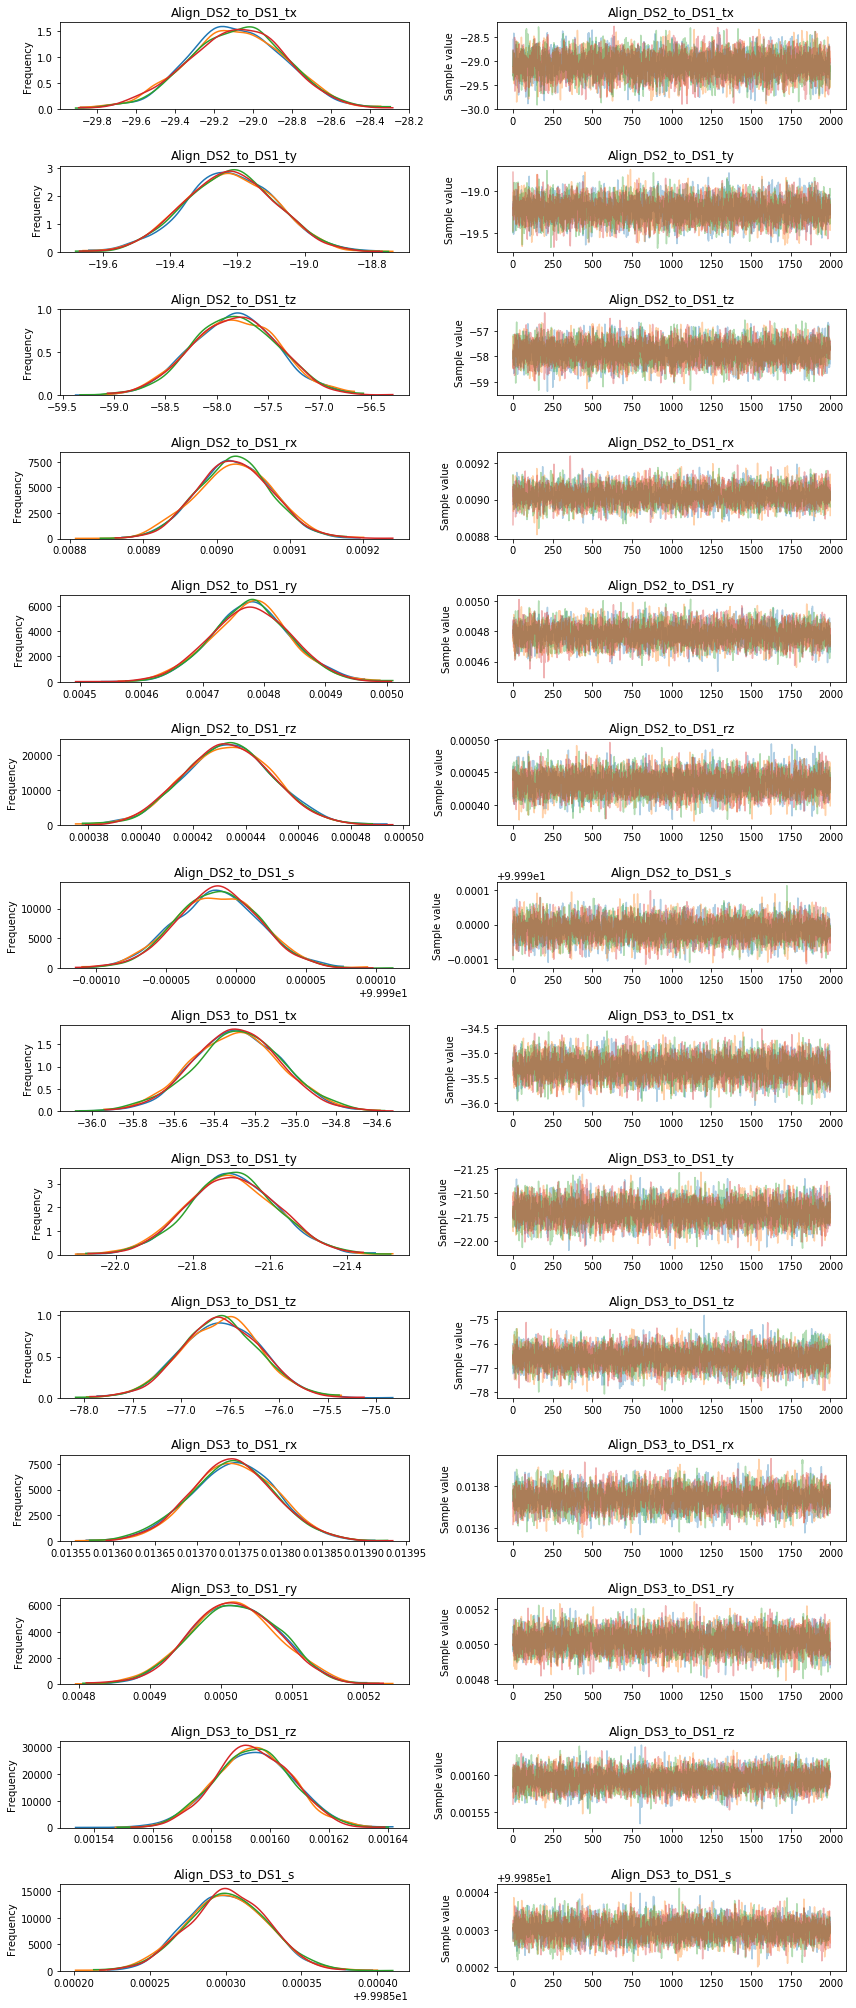

In [12]:
pm.traceplot(trace)

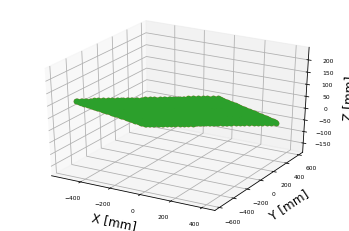

In [8]:
ax1=tc.mf.plotting.plot_dataset_3d(model.reference)
tc.mf.plotting.plot_dataset_3d(model.datasets[0], ax=ax1)
tc.mf.plotting.plot_dataset_3d(model.datasets[1], ax=ax1)

In [7]:
errorscale1=trace.get_values('MultiAlign_error_scale_DS1')

KeyError: 'MultiAlign_error_scale_DS1'

In [6]:
np.mean(np.abs(errorscale1),axis=0)

array([2.33999059, 4.81382334, 0.80577116])

In [7]:
errorscale2=trace.get_values('MultiAlign_error_scale_DS2')

In [8]:
np.mean(np.abs(errorscale2),axis=0)

array([0.59611901, 1.90050301, 0.48541609])

In [9]:
errorscale3=trace.get_values('MultiAlign_error_scale_DS3')

In [10]:
np.mean(np.abs(errorscale3),axis=0)

array([2.6255734 , 7.05143474, 0.92719312])

In [11]:
xlevels=tc.mf.util.find_credible_levels(x=errorscale2[:,0],y=errorscale3[:,0])
ylevels=tc.mf.util.find_credible_levels(errorscale2[:,1],errorscale3[:,1])
zlevels=tc.mf.util.find_credible_levels(errorscale2[:,2],errorscale3[:,2])
xlevels, ylevels, zlevels

([0.0,
  0.7583743428660441,
  2.275123028598133,
  12.133989485860521,
  44.74408622911314],
 [0.0,
  0.40580402223459927,
  0.8116080444711362,
  4.463844244580594,
  17.043768933857045],
 [0.0,
  6.637344271984211,
  13.274688543969482,
  73.01078699183059,
  298.6804922392906])

Text(0, 0.5, 'Errorscale3')

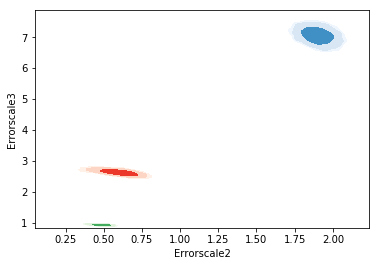

In [12]:
ax = sns.kdeplot(errorscale2[:,0], errorscale3[:,0],cmap="Reds",shade=True, shade_lowest=False, levels=xlevels)
ax = sns.kdeplot(errorscale2[:,1], errorscale3[:,1],cmap="Blues",shade=True, shade_lowest=False, levels=ylevels)
ax = sns.kdeplot(errorscale2[:,2], errorscale3[:,2],cmap="Greens",shade=True, shade_lowest=False, levels=zlevels)
ax.set_xlabel('Errorscale2')
ax.set_ylabel('Errorscale3')

In [22]:
print(model.alignments[0].name)
tc.mf.util.trace_array(model.alignments[0].sd, model, trace2)

Align_DS2_to_DS1


array([[[0.01044847, 0.00965197, 0.0124278 , ..., 0.01079115,
         0.00988126, 0.01619686],
        [0.0044759 , 0.00385856, 0.00469366, ..., 0.004526  ,
         0.00410344, 0.00464658],
        [0.01549798, 0.01581344, 0.01875348, ..., 0.01527857,
         0.01448034, 0.02163559]],

       [[0.01044848, 0.00965198, 0.01242781, ..., 0.01079115,
         0.00988126, 0.01619686],
        [0.00447588, 0.00385854, 0.00469364, ..., 0.00452598,
         0.00410342, 0.00464656],
        [0.01549797, 0.01581344, 0.01875347, ..., 0.01527857,
         0.01448033, 0.02163558]],

       [[0.01044848, 0.00965198, 0.01242781, ..., 0.01079116,
         0.00988126, 0.01619687],
        [0.00447589, 0.00385855, 0.00469365, ..., 0.00452599,
         0.00410343, 0.00464657],
        [0.01549797, 0.01581344, 0.01875347, ..., 0.01527857,
         0.01448033, 0.02163558]],

       ...,

       [[0.01044846, 0.00965196, 0.01242779, ..., 0.01079114,
         0.00988125, 0.01619685],
        [0.00447588, 

In [4]:
diffs,errors = model.calc_diff(trace=trace)
diffs2,errors2 = model.calc_diff2(trace=trace)

In [5]:
diffs

{'Align_DS2_to_DS1': array([[[-0.01365381, -0.01269508, -0.00824127, ..., -0.03831019,
          -0.01561886, -0.0351802 ],
         [ 0.06912571,  0.0553206 ,  0.06565765, ...,  0.04747919,
           0.03462681,  0.06077473],
         [ 0.04357724,  0.07702407,  0.05637134, ...,  0.04973525,
           0.04814888,  0.04908633]],
 
        [[-0.01422999, -0.01316953, -0.00894609, ..., -0.03884631,
          -0.01622581, -0.03587531],
         [ 0.06986146,  0.05620003,  0.06617935, ...,  0.04828837,
           0.03531222,  0.06132358],
         [ 0.04311514,  0.07771782,  0.05612773, ...,  0.0487844 ,
           0.04769892,  0.04823468]],
 
        [[-0.01432921, -0.01322298, -0.00878961, ..., -0.03910291,
          -0.01627141, -0.03584831],
         [ 0.06930183,  0.05569127,  0.06553553, ...,  0.04776017,
           0.03473292,  0.06069319],
         [ 0.04327249,  0.07729085,  0.05574537, ...,  0.04942875,
           0.0477578 ,  0.04834286]],
 
        ...,
 
        [[-0.0137175

In [28]:
np.sum((errors2['DS1-DS3']-errors['Align_DS3_to_DS1'])!=0)

0

In [10]:
diffs['Align_DS2_to_DS1'].shape

(8000, 3, 1627)

In [9]:
diffs.keys()

dict_keys(['DS1-DS2', 'DS1-DS3', 'DS2-DS3'])

In [30]:
sigerror = {}
for k in diffs2:
    sigerror[k] = np.mean(diffs2[k]/errors2[k], axis=0)


In [12]:
np.shape(sigerror['Align_DS3_to_DS1'])

(3, 1627)

In [17]:
#1-sigma levels:
for k in sigerror:
    print(k,np.sum(np.abs(sigerror[k].flat)<1)/len(sigerror[k].flat))

DS1-DS2 0.07682851874615858
DS1-DS3 0.0743700061462815
DS2-DS3 0.3118213480844089


In [14]:
#2-sigma levels:
for k in sigerror:
    print(k,np.sum(np.abs(sigerror[k].flat)<2)/len(sigerror[k].flat))

Align_DS2_to_DS1 0.28887523048555624
Align_DS3_to_DS1 0.05818479819709076


In [32]:
sigerror['DS1-DS3'].shape

(3, 1627)

(array([  2.,   0.,   1.,   1.,   2.,  11.,  16.,  27.,  51.,  66.,  95.,
        128., 163., 199., 203., 170., 160., 109.,  82.,  58.,  32.,  22.,
         15.,   8.,   4.,   0.,   0.,   1.,   0.,   1.]),
 array([0.10137377, 0.3754259 , 0.64947803, 0.92353016, 1.19758228,
        1.47163441, 1.74568654, 2.01973867, 2.2937908 , 2.56784293,
        2.84189505, 3.11594718, 3.38999931, 3.66405144, 3.93810357,
        4.21215569, 4.48620782, 4.76025995, 5.03431208, 5.30836421,
        5.58241634, 5.85646846, 6.13052059, 6.40457272, 6.67862485,
        6.95267698, 7.2267291 , 7.50078123, 7.77483336, 8.04888549,
        8.32293762]),
 <a list of 30 Patch objects>)

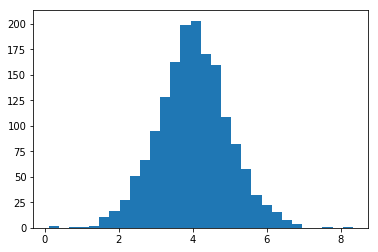

In [35]:
plt.hist(sigerror['DS1-DS3'][2,:],30)

In [37]:
errors2['DS1-DS3']

array([[[0.00760283, 0.00760283, 0.00756654, ..., 0.00760283,
         0.00954168, 0.008045  ],
        [0.00210804, 0.00210804, 0.0024688 , ..., 0.00210804,
         0.00286375, 0.00234139],
        [0.0168374 , 0.0168374 , 0.01675839, ..., 0.0168374 ,
         0.01999967, 0.01556553]],

       [[0.00760282, 0.00760282, 0.00756652, ..., 0.00760282,
         0.00954166, 0.00804499],
        [0.00210805, 0.00210805, 0.0024688 , ..., 0.00210805,
         0.00286376, 0.00234139],
        [0.01683741, 0.01683741, 0.0167584 , ..., 0.01683741,
         0.01999968, 0.01556554]],

       [[0.00760282, 0.00760282, 0.00756652, ..., 0.00760282,
         0.00954167, 0.00804499],
        [0.00210804, 0.00210804, 0.0024688 , ..., 0.00210804,
         0.00286375, 0.00234138],
        [0.01683741, 0.01683741, 0.0167584 , ..., 0.01683741,
         0.01999968, 0.01556554]],

       ...,

       [[0.00760281, 0.00760281, 0.00756652, ..., 0.00760281,
         0.00954166, 0.00804499],
        [0.00210804, 

In [25]:
diffdists = {}
for k in diffs:
    diffdists[k] = np.linalg.norm(diffs[k],axis=1)

In [27]:
np.shape(diffdists['DS1-DS2'])

(8000, 1627)

In [29]:
meandiffdists = {}
for k in diffdists:
    meandiffdists[k] = np.mean(diffdists[k],axis=0)

In [7]:
import pickle

In [25]:
with open('moons_sigerror.pkl', 'wb') as f:
    pickle.dump(sigerror, f)

In [22]:
sigerror

{'DS1-DS2': array([[-0.73764359, -5.9147979 ,  0.24813591, ..., -0.30800187,
          0.07342363,  2.64690022],
        [-1.71526477, -2.40652946,  3.93189323, ..., -5.10869732,
          2.08537523,  2.20234937],
        [ 0.2126905 ,  0.39062684, -1.01838526, ..., -0.78148552,
          0.17139263,  0.99818452]]),
 'DS1-DS3': array([[ -2.93356567,  -7.50031414,  -0.0643211 , ...,   0.20264296,
           2.98832529,   4.24672301],
        [ -4.41982044, -16.10298996,  17.18786877, ...,   0.25558237,
          11.48398094,   6.839884  ],
        [ -0.8818263 ,  -0.13166042,  -2.15676495, ...,  -0.42531189,
          -0.0428383 ,   1.40967167]]),
 'DS2-DS3': array([[-1.56342129,  0.47118526, -0.32763097, ...,  0.4743909 ,
          2.39627144,  0.52162031],
        [-1.60174888, -5.40660679,  4.39240926, ...,  5.26782452,
          4.88194571,  2.71770874],
        [-1.13371253, -0.52152375, -1.27457162, ...,  0.35545551,
         -0.24917911,  0.48035207]])}

In [12]:
diffmeans = {}
for k in diffs:
    diffmeans[k] = np.mean(diffs[k],axis=0)

In [17]:
errormeans = {}
for k in errors:
    errormeans[k] = np.mean(errors[k],axis=0)

In [13]:
diffmeans.keys()

dict_keys(['DS1-DS2', 'DS1-DS3', 'DS2-DS3'])

In [19]:
errormeans['DS1-DS2'][0]

array([0.01079115, 0.00988125, 0.01156036, ..., 0.0110113 , 0.01106799,
       0.01058153])

In [20]:
diffmeans['DS1-DS2'][0]

array([ 0.01065238, -0.03602663,  0.01268776, ...,  0.00999925,
       -0.0007067 , -0.00486737])

In [23]:
with open('moons_diffs_errors.pkl', 'wb') as f:
    pickle.dump({'errors':errormeans, 'diffs':diffmeans},f)

In [25]:
model.ref

AttributeError: 'AlignManyDatasets' object has no attribute 'ref'

In [3]:
model.reference.write_data_file('moons_ref.txt')

In [10]:
tc.mf.mirrorfit

AttributeError: module 'mirrorfithmc' has no attribute 'mirrorfit'

In [4]:
refarray=model.reference.to_array()

In [8]:
with open('ds1refarray_positions.pkl', 'wb') as f:
    pickle.dump(refarray,f)

In [44]:
ds2to1trans, error = model.alignments[0].mean_transform(trace)
ds3to1trans, error = model.alignments[1].mean_transform(trace)

In [47]:
print(model.alignments[0].name)
print(model.alignments[1].name)

Align_DS2_to_DS1
Align_DS3_to_DS1


In [35]:
ds2alignedtensor = ds2to1trans*model.datasets[0].to_tensors()
ds2aligned = tc.mf.DatasetArrays(pos=ds2alignedtensor.pos.eval().T, err=ds2alignedtensor.err.eval().T, serr=ds2alignedtensor.serr.eval().T)
ds2aligned

DatasetArrays(pos=array([[ 136.48079217, -277.14823145,  128.03356042],
       [-529.85197227,  501.08013594, -162.27513778],
       [-322.88536743,   61.82397657,  -20.65175919],
       ...,
       [ 155.11642645, -512.46698926,  190.6470744 ],
       [-427.06751428,  -83.21741939,    2.41437456],
       [ -63.89777109,  102.90256042,    3.84276215]]), err=array([[0.00800003, 0.00309813, 0.01029879],
       [0.00909993, 0.00389802, 0.0104988 ],
       [0.00799995, 0.00339826, 0.00929894],
       ...,
       [0.00810012, 0.00379787, 0.01149877],
       [0.00799995, 0.00339826, 0.00929894],
       [0.00819995, 0.00429812, 0.00959903]]), serr=array([[0.00800003, 0.00309813, 0.01029879],
       [0.00909993, 0.00389802, 0.0104988 ],
       [0.00799995, 0.00339826, 0.00929894],
       ...,
       [0.00810012, 0.00379787, 0.01149877],
       [0.00799995, 0.00339826, 0.00929894],
       [0.00819995, 0.00429812, 0.00959903]]))

In [36]:
ds2aligned.pos.shape

(1627, 3)

In [39]:
ds2alignedds = model.datasets[0].remake_from_arrays(ds2aligned)

In [40]:
ds2alignedds.write_data_file('moons_ds2_mcmc_triple_mean_aligned.txt')

In [41]:
ds3alignedtensor = ds3to1trans*model.datasets[1].to_tensors()
ds3aligned = tc.mf.DatasetArrays(pos=ds3alignedtensor.pos.eval().T, err=ds3alignedtensor.err.eval().T, serr=ds3alignedtensor.serr.eval().T)
ds3aligned

DatasetArrays(pos=array([[ 136.48791656, -277.14765531,  128.01991689],
       [-529.84940924,  501.06246621, -162.26898093],
       [-322.88390609,   61.81750818,  -20.63508725],
       ...,
       [ 155.11451187, -512.46017354,  190.64903718],
       [-427.07223241,  -83.23080467,    2.44175617],
       [ -63.90197772,  102.88330493,    3.82888018]]), err=array([[0.00520034, 0.00139682, 0.01299797],
       [0.00540022, 0.00179698, 0.01209818],
       [0.00460021, 0.00149737, 0.0105984 ],
       ...,
       [0.00520034, 0.00139682, 0.01299797],
       [0.00460021, 0.00149737, 0.0105984 ],
       [0.00460021, 0.00149737, 0.0105984 ]]), serr=array([[0.00520034, 0.00139682, 0.01299797],
       [0.00540022, 0.00179698, 0.01209818],
       [0.00460021, 0.00149737, 0.0105984 ],
       ...,
       [0.00520034, 0.00139682, 0.01299797],
       [0.00460021, 0.00149737, 0.0105984 ],
       [0.00460021, 0.00149737, 0.0105984 ]]))

In [51]:
ds3alignedds = model.datasets[1].remake_from_arrays(ds3aligned)

In [52]:
ds3alignedds.write_data_file('moons_ds3_mcmc_triple_mean_aligned.txt')